In [1]:
#Check if running on google colab and if so, install needed packages
try:
    import google.colab
    running_on_colab = True
except ImportError:
    running_on_colab = False

if(running_on_colab):
    ! wget https://raw.githubusercontent.com/reml-lab/MLDemos/refs/heads/main/BasicMLP.py
    ! pip install matplotlib
    ! pip install pandas
    ! pip install numpy
    ! pip install -U scikit-learn
    ! pip install ucimlrepo


--2025-09-24 14:16:15--  https://raw.githubusercontent.com/reml-lab/MLDemos/refs/heads/main/BasicMLP.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 906 [text/plain]
Saving to: ‘BasicMLP.py.1’

BasicMLP.py.1       100%[===================>]     906  --.-KB/s    in 0s      

2025-09-24 14:16:15 (53.1 MB/s) - ‘BasicMLP.py.1’ saved [906/906]



In [2]:
try:
    import numpy as np
    from BasicMLP import BasicMLP
    import matplotlib.pyplot as plt
    import sklearn
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    from ucimlrepo import fetch_ucirepo
except Exception as e:
    print("Failed to import needed packages.")
    print("If running on Colab, plase make sure to run the cell above to install packages.")
    print("If running locally, please run: pip install -r requirement.txt to install dependencies.")

# **Data Download and Preprocessing**

In [3]:
def stratified_data_split(vali_ratio, test_ratio, X, y):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=test_ratio, stratify=y,random_state=589)
    X_train, X_vali, y_train, y_vali = sklearn.model_selection.train_test_split(X_train,y_train,test_size=vali_ratio, stratify=y_train, random_state=589)
    return X_train, X_vali, X_test, y_train, y_vali, y_test

# fetch dataset
dataset = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = dataset.data.features.to_numpy()
y = dataset.data.targets.to_numpy().reshape(-1,)

X_train, X_val, X_test, y_train, y_val, y_test = stratified_data_split(0.2, 0.2, X,y)


# **KNN Experiments**

## **Q4.a** Train a KNN classifier with K=5

In [4]:
from sklearn.metrics import zero_one_loss

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_train_pred = knn.predict(X_train)
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

train_error = zero_one_loss(y_train, y_train_pred)
val_error = zero_one_loss(y_val, y_val_pred)
test_error = zero_one_loss(y_test, y_test_pred)

print(f"Train Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error: {test_error:.4f}")

Train Error: 0.0853
Validation Error: 0.1082
Test Error: 0.1207


## **Q4.b** Compute train and validation error rate for values of K from 1 to 150.

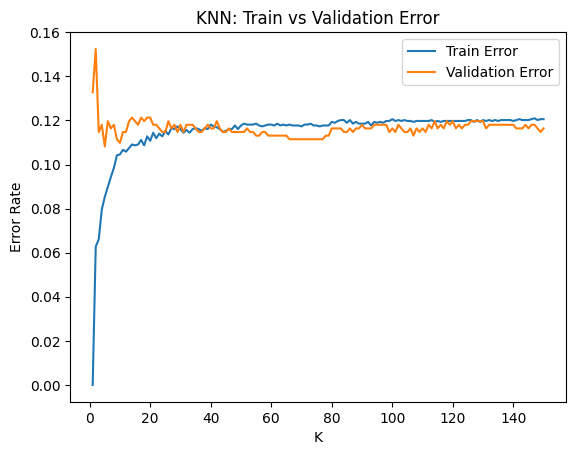

In [5]:
import matplotlib.pyplot as plt

k_values = range(1, 151)
train_errors = []
val_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)

    train_errors.append(zero_one_loss(y_train, y_train_pred))
    val_errors.append(zero_one_loss(y_val, y_val_pred))

plt.plot(k_values, train_errors, label="Train Error")
plt.plot(k_values, val_errors, label="Validation Error")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("KNN: Train vs Validation Error")
plt.legend()
plt.show()

## **Q4.c** Determine the optimal value of K and compute error rates

In [6]:
# find K with lowest validation error
optimal_k = k_values[np.argmin(val_errors)]

# retrain KNN with optimal K
knn_opt = KNeighborsClassifier(n_neighbors=optimal_k)
knn_opt.fit(X_train, y_train)

# compute error rates
train_error = zero_one_loss(y_train, knn_opt.predict(X_train))
val_error = zero_one_loss(y_val, knn_opt.predict(X_val))
test_error = zero_one_loss(y_test, knn_opt.predict(X_test))

print(f"Optimal K: {optimal_k}")
print(f"Train Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error: {test_error:.4f}")


Optimal K: 5
Train Error: 0.0853
Validation Error: 0.1082
Test Error: 0.1207


## **Q4.d** Repeat (a)-(c) after applying the StandardScalar to normalize the data.

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

#Continue the solution below...

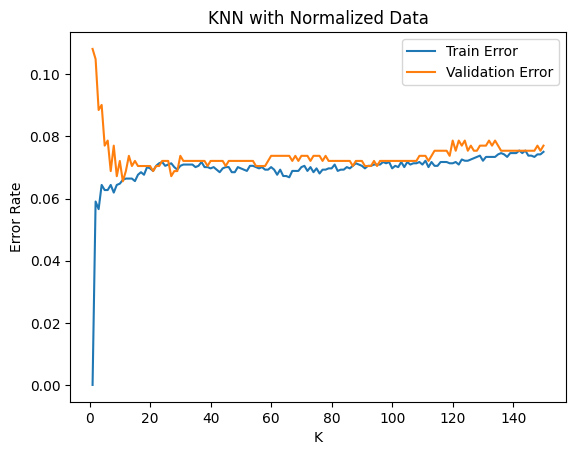

In [8]:
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt

k_values = range(1, 151)
train_errors = []
val_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_norm, y_train)

    y_train_pred = knn.predict(X_train_norm)
    y_val_pred = knn.predict(X_val_norm)

    train_errors.append(zero_one_loss(y_train, y_train_pred))
    val_errors.append(zero_one_loss(y_val, y_val_pred))

plt.plot(k_values, train_errors, label="Train Error")
plt.plot(k_values, val_errors, label="Validation Error")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("KNN with Normalized Data")
plt.legend()
plt.show()

In [9]:
optimal_k = k_values[np.argmin(val_errors)]

knn_opt = KNeighborsClassifier(n_neighbors=optimal_k)
knn_opt.fit(X_train_norm, y_train)

train_error = zero_one_loss(y_train, knn_opt.predict(X_train_norm))
val_error = zero_one_loss(y_val, knn_opt.predict(X_val_norm))
test_error = zero_one_loss(y_test, knn_opt.predict(X_test_norm))

print(f"Optimal K: {optimal_k}")
print(f"Train Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error: {test_error:.4f}")

Optimal K: 11
Train Error: 0.0660
Validation Error: 0.0656
Test Error: 0.0709


# **Multi Layer Perceptron Experiments**

## **Q4.e** Training basic MLP classifier

In [10]:
import BasicMLP
from sklearn.metrics import zero_one_loss

# instantiate model with default parameters
mlp = BasicMLP.BasicMLP(
    hidden_layer_size=8,
    learning_rate_init=0.01,
    max_iter=5000
)

# train
mlp.fit(X_train_norm, y_train)

# predictions
y_train_pred = mlp.predict(X_train_norm)
y_val_pred = mlp.predict(X_val_norm)
y_test_pred = mlp.predict(X_test_norm)

# error rates
train_error = zero_one_loss(y_train, y_train_pred)
val_error = zero_one_loss(y_val, y_val_pred)
test_error = zero_one_loss(y_test, y_test_pred)

print(f"Train Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error: {test_error:.4f}")


Train Error: 0.0648
Validation Error: 0.0705
Test Error: 0.0761


## **Q4.f** Compute train and validation error rates with different hidden unit sizes

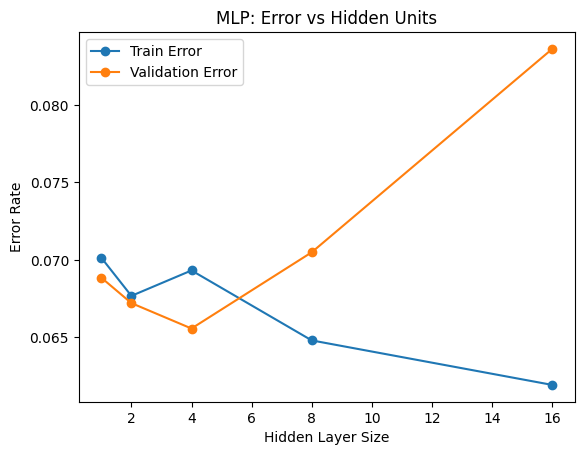

In [11]:
hidden_sizes = [1, 2, 4, 8, 16]
train_errors = []
val_errors = []

for h in hidden_sizes:
    mlp = BasicMLP.BasicMLP(
        hidden_layer_size=h,
        learning_rate_init=0.01,
        max_iter=5000
    )
    mlp.fit(X_train_norm, y_train)

    y_train_pred = mlp.predict(X_train_norm)
    y_val_pred = mlp.predict(X_val_norm)

    train_errors.append(zero_one_loss(y_train, y_train_pred))
    val_errors.append(zero_one_loss(y_val, y_val_pred))

# plot
plt.plot(hidden_sizes, train_errors, marker="o", label="Train Error")
plt.plot(hidden_sizes, val_errors, marker="o", label="Validation Error")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Error Rate")
plt.title("MLP: Error vs Hidden Units")
plt.legend()
plt.show()


## **Q4.g** Determine the optimal number of hidden units and compute error rates

In [12]:
optimal_h = hidden_sizes[np.argmin(val_errors)]

# retrain with optimal hidden size
mlp_opt = BasicMLP.BasicMLP(
    hidden_layer_size=optimal_h,
    learning_rate_init=0.01,
    max_iter=5000
)
mlp_opt.fit(X_train_norm, y_train)

# compute error rates
train_error = zero_one_loss(y_train, mlp_opt.predict(X_train_norm))
val_error = zero_one_loss(y_val, mlp_opt.predict(X_val_norm))
test_error = zero_one_loss(y_test, mlp_opt.predict(X_test_norm))

print(f"Optimal hidden units: {optimal_h}")
print(f"Train Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error: {test_error:.4f}")


Optimal hidden units: 4
Train Error: 0.0693
Validation Error: 0.0656
Test Error: 0.0735


## **Q4.h** Effect of maximum number of iterations

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


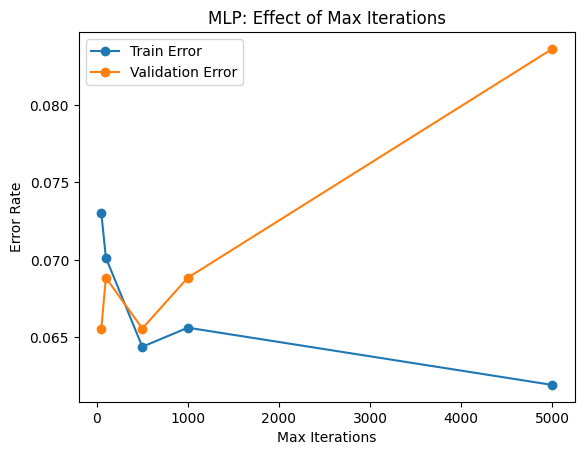

In [13]:
iter_values = [50, 100, 500, 1000, 5000]
train_errors = []
val_errors = []

for m in iter_values:
    mlp = BasicMLP.BasicMLP(
        hidden_layer_size=16,
        learning_rate_init=0.01,
        max_iter=m
    )
    mlp.fit(X_train_norm, y_train)

    y_train_pred = mlp.predict(X_train_norm)
    y_val_pred = mlp.predict(X_val_norm)

    train_errors.append(zero_one_loss(y_train, y_train_pred))
    val_errors.append(zero_one_loss(y_val, y_val_pred))

# plot
plt.plot(iter_values, train_errors, marker="o", label="Train Error")
plt.plot(iter_values, val_errors, marker="o", label="Validation Error")
plt.xlabel("Max Iterations")
plt.ylabel("Error Rate")
plt.title("MLP: Effect of Max Iterations")
plt.legend()
plt.show()